In [1]:
from sklearn.datasets import make_blobs #自己创建的数据集：生成几个cluster
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#生成500个样本，2个特征的数据集 4个中心
X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

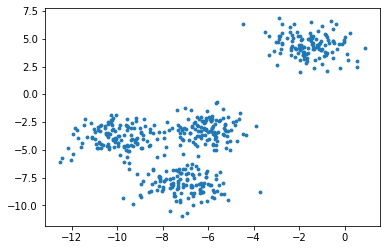

In [5]:
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:,0],X[:,1]
           ,marker='o'  #点的形状
           ,s=8  #点的大小)
           )
plt.show()

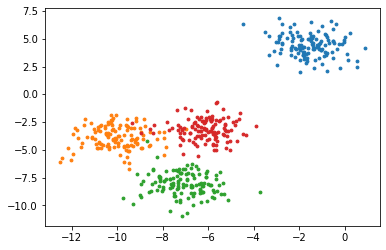

In [10]:
color = ['red','yellow','blue','orange']
fig, ax1 = plt.subplots(1)

for i in range(4):
    ax1.scatter(X[y==i,0],X[y==i,1]
               ,marker='o'  #点的形状
               ,s=8  #点的大小)
               )
plt.show()

In [9]:
set(y)

{0, 1, 2, 3}

In [11]:
from sklearn.cluster import KMeans
n = 3

# 完成聚类 - 求出质心
cluster = KMeans(n_clusters=n, random_state=0).fit(X)

In [12]:
#重要属性 labels_:查看聚好的类，每个样本所对应的类
y_pred = cluster.labels_
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

KMeans也有predict和fit_predict,表示学习数据X并对X的聚类进行预测
得到的结果和labels_一样

何时使用predict和fit_predict?
当样本量特别大的时候，KMeans计算时间很长
可以先切片一部分fit_predict，再把整个样本样本放进去结果中
cluster_smallsub = KMeans(n_clusters=n, random_state=0).fit(X[:200])
y_pred = cluster_smallsub.predict(X)
有时候可以用较少的数据得到比较类似的质心

In [13]:
# 重要属性cluster_centers_： 查看质心
centroid = cluster.cluster_centers_
centroid

array([[-7.09306648, -8.10994454],
       [-1.54234022,  4.43517599],
       [-8.0862351 , -3.5179868 ]])

In [14]:
centroid.shape

(3, 2)

In [15]:
# 重要属性intertia_:查看总距离的平方和
inertia = cluster.inertia_
inertia

1903.4503741659241

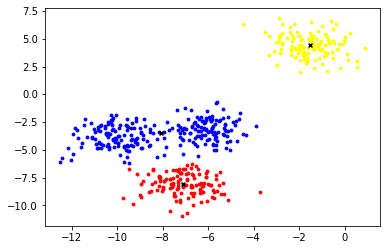

In [17]:
color = ['red','yellow','blue','orange']
fig, ax1 = plt.subplots(1)

for i in range(n):
    ax1.scatter(X[y_pred==i,0],X[y_pred==i,1]
               ,marker='o'  #点的形状
               ,s=8  #点的大小
               ,c=color[i])
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker='x'
           ,s=15
           ,c='black')    

plt.show()

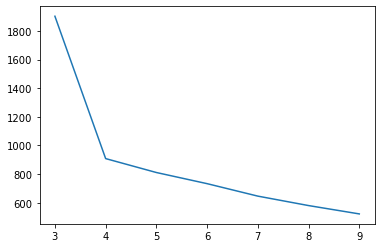

In [22]:
# n_claster越大，inertia就会越小 - inertia不是KMeans的评估指标
iner = []

for i in range(3,10):
    cluster = KMeans(n_clusters=i, random_state=0).fit(X)
    inertia = cluster.inertia_
    iner.append(inertia)
    
plt.plot(range(3,10),iner)
plt.show()

聚类算法的模型评估指标：轮廓系数 - 同时计算组内差距和组间差距
结果在[-1,1]之间
[-1,0]  聚类效果不好
[0.1]  聚类效果好，越接近1越好

sklearn.metrics.silhouette_score：返回一个值，是数据集中所有样本的轮廓系数的均值
sihouette_samples:返回数据集中每个样本的轮廓系数

优缺点：
有点： 对数据分布没有假设，因此在大部分数据集上表现良好
缺点： 在凸型数据上表现虚高，比如基于密度进行的聚类，或通过DBSCAN获得的聚类效果，如果使用轮廓系数来衡量，会表现出比真实聚类效果更高的分数

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [25]:
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [26]:
silhouette_score(X,y_pred)

0.5882004012129721

In [27]:
cluster = KMeans(n_clusters=4, random_state=0).fit(X)
inertia = cluster.inertia_

In [28]:
inertia

908.3855684760603

In [32]:
silhouette_score(X,cluster.labels_) #分4簇结果更好

0.6505186632729437

In [33]:
cluster = KMeans(n_clusters=5, random_state=0).fit(X)
silhouette_score(X,cluster.labels_)

0.5746932321727457

In [37]:
silhouette_samples(X,y_pred).mean() #=silhouette_score(X,y_pred)

0.5882004012129721

当真实标签未知时，其他的模型评估指标：
1. CHI sklearn.metrics.calinski_harabasz_score(X,y_pred) 卡林斯基-哈拉巴斯指数
   越高越好
   数据量很大的时候使用
2. sklearn.metrics.davies_bouldin_score(X,y_pred) 戴维斯-布尔丁指数
3. sklearn.metrics.cluster.contingency_metrix(X.y_pred) 权变矩阵

In [40]:
from sklearn.metrics import calinski_harabasz_score

# 记录时间：时间戳
from time import time
t0 = time()
calinski_harabasz_score(X,y_pred)
time()-t0

0.0009849071502685547

In [41]:
from sklearn.metrics import calinski_harabasz_score

# 记录时间：时间戳
from time import time
t0 = time()
silhouette_score(X,y_pred)
time()-t0

0.006951093673706055

In [42]:
t0

1657512493.2328632

In [43]:
import datetime
datetime.datetime.fromtimestamp(t0).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-11 16:08:13'